In [66]:
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
data = "hakusan_elec.csv"
df = pd.read_csv(data,skiprows=1)
df.head()

,Date,bldg_1,bldg_2&3,bldg_4,bldg_5,bldg_6,bldg_7,bldg_8&9,bldg_10,Hosui-kaikan,Total
0,2014/4/1,5940,8480,1800,1800,6000,62,3660,0,384,28116
1,2014/4/2,5460,8550,1600,2100,5700,65,3700,0,337,27512
2,2014/4/3,5390,8220,2000,2000,6800,70,3720,0,418,28667
3,2014/4/4,4220,8280,1800,2000,7200,70,3720,0,399,27719
4,2014/4/5,5650,7840,1500,1900,5000,65,3220,0,239,25384


# １番

In [68]:
df['Date'] = pd.to_datetime(df['Date'])
print(df['Date'].dtype)

datetime64[ns]


# ２番

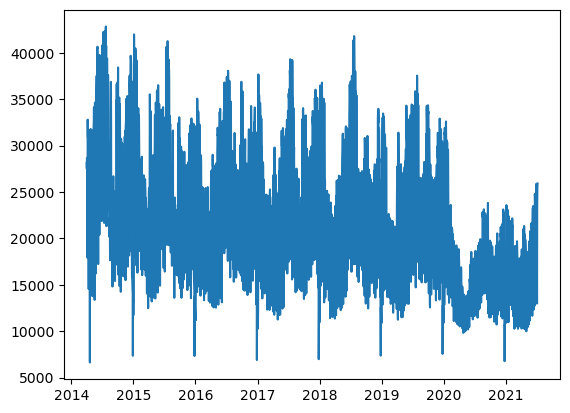

In [69]:
plt.plot(df['Date'], df['Total'])

# ３番

In [70]:
df.set_index('Date').head()


,bldg_1,bldg_2&3,bldg_4,bldg_5,bldg_6,bldg_7,bldg_8&9,bldg_10,Hosui-kaikan,Total
Date,,,,,,,,,,
2014-04-01,5940,8480,1800,1800,6000,62,3660,0,384,28116
2014-04-02,5460,8550,1600,2100,5700,65,3700,0,337,27512
2014-04-03,5390,8220,2000,2000,6800,70,3720,0,418,28667
2014-04-04,4220,8280,1800,2000,7200,70,3720,0,399,27719
2014-04-05,5650,7840,1500,1900,5000,65,3220,0,239,25384


# ４番

In [71]:
df_rolling30d = df['Total'].rolling(window=30).mean()
df_rolling30d.head(35)

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
5              NaN
6              NaN
7              NaN
8              NaN
9              NaN
10             NaN
11             NaN
12             NaN
13             NaN
14             NaN
15             NaN
16             NaN
17             NaN
18             NaN
19             NaN
20             NaN
21             NaN
22             NaN
23             NaN
24             NaN
25             NaN
26             NaN
27             NaN
28             NaN
29    27174.266667
30    27252.833333
31    27369.866667
32    26887.133333
33    26425.566667
34    26054.066667
Name: Total, dtype: float64

# ５番

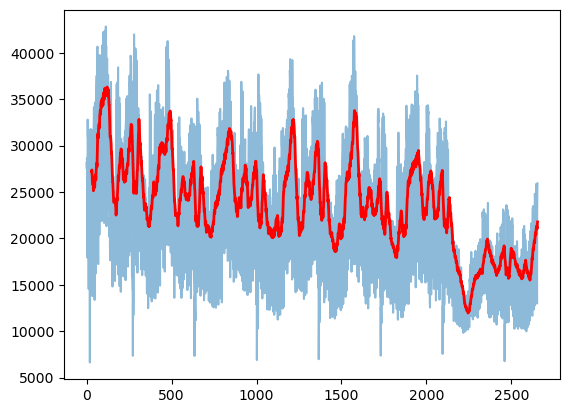

In [72]:
plt.plot(df.index, df['Total'], label='日次データ', alpha=0.5)
plt.plot(df.index, df_rolling30d, label='30日移動平均', linewidth=2, color='red')

# ６番

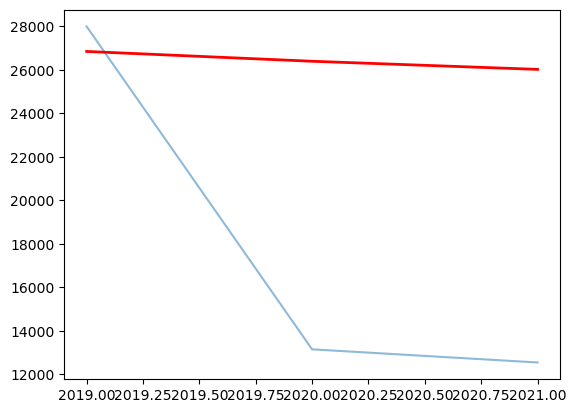

In [73]:
start_date = '2018-04-01'
end_date = '2021-03-31'

plt.plot(df.loc[start_date:end_date].index, df.loc[start_date:end_date]['Total'], label='日次データ', alpha=0.5)
plt.plot(df.loc[start_date:end_date].index, df_rolling30d.loc[start_date:end_date], label='30日移動平均', linewidth=2, color='red')

# ７番

In [74]:
df = df.set_index('Date')
df_resample_w = df.resample('W').mean()
df_resample_w.head()

,bldg_1,bldg_2&3,bldg_4,bldg_5,bldg_6,bldg_7,bldg_8&9,bldg_10,Hosui-kaikan,Total
Date,,,,,,,,,,
2014-04-06,4838.333333,7988.333333,1633.333333,1950.000000,5750.000000,65.666667,3323.333333,0.0,322.500000,25884.666667
2014-04-13,5167.142857,8765.714286,1785.714286,1871.428571,6542.857143,107.571429,3494.285714,0.0,342.714286,28101.857143
2014-04-20,4401.428571,8415.714286,1771.428571,1657.142857,6371.428571,106.571429,3391.428571,0.0,315.857143,26458.428571
2014-04-27,4418.571429,8728.571429,1900.000000,1742.857143,6571.428571,107.142857,3447.142857,0.0,351.714286,27289.000000
2014-05-04,4214.285714,8245.714286,1800.000000,1385.714286,6342.857143,101.857143,2877.142857,0.0,236.571429,25218.285714


# ８番

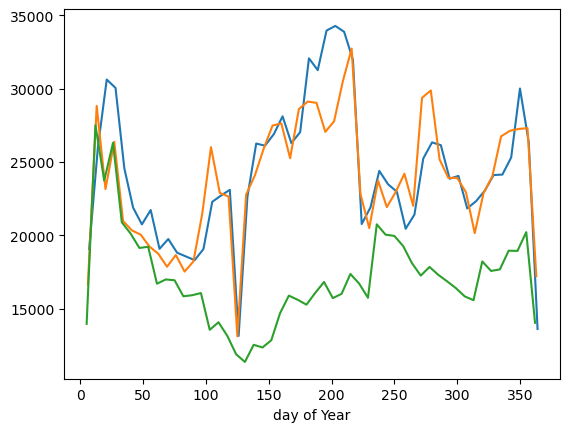

In [77]:
for year in range(2018, 2021):
    yearly_data = df_resample_w[df_resample_w.index.year == year]
    day_of_year = yearly_data.index.dayofyear
    
    plt.plot(day_of_year, yearly_data['Total'], label=str(year))
    plt.xlabel('day of Year')

# ９番

<BarContainer object of 7 artists>

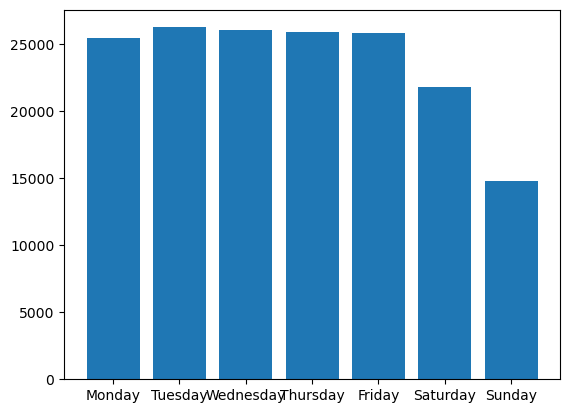

In [76]:
weekday_avg = df.groupby(df.index.dayofweek)['Total'].mean()
weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_avg.index = weekday_names

plt.bar(weekday_avg.index, weekday_avg.values)